# Onda de sonido 🎵
En este Notebook vamos a ver como podemos dibujar la ecuacion de la onda de sonido y como podemos cambiar las caracteristicas de la onda y del sonido de una manera interactiva usando ***Ipywidgets*** ademas de otras librerias como NumPy y Matplotlib.

## 1. Importar librerias
Para usar ciertas funciones necesitamos importar primero de todo las librerias (o coleccion de funciones) que contienen dichas funciones.

🚨 **Importante**: para ejecutar el codigo, como el que hay en la celda debajo de este texto, clica en dicha celda con el raton y después pulsa el botón “**▶ Run**” que verás en el menu de arriba o sino tambien puedes presionar las teclas **shift** (dejandolo pulsado) **+ enter** de tu teclado.

In [1]:
# Librerias para calculos matematicos
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display, Audio

## 2. Definir la ecuacion de una onda de sonido
<left><img src="util/onda_sonido.gif" width="400px">

Una onda de sonido puede ser representada con una **curva sinusoidal** definida por los parametros: **amplitud, fase y frecuencia**. Para ello usamos la siguiente ecuacion:

$y(x) = A \sin( 2 \pi (\nu x + \phi ))$

donde

$A = amplitud$

$\phi = fase$

$\nu = frecuenca$

En la celda de abajo vamos a crear: 
- tres variables para definir la amplitud, la fase y la frecuencia: ***amp, fase, frec***
- un vector (o array) para definir los puntos en los que la ecuacion de la curva sera calculada: ***x***
- la ecuacion de la curva (en funcion de *x*): ***y***
    
Para ello vamos a usar algunas de las funciones que vienen incluidas en la libreria **Numpy**, en particular vamos a usar las funciones: 
- **arange**: para generar un vector de valores de 0 a 1 en intervalos de 0.01
- **pi**: para obtener el valor pi.
- **sin**: funcion seno
    
🚨 No olvides que para ejecutar el codigo que hay en la celda debajo de este texto tienes que clicar en dicha celda con el ratón y después pulsar el botón “**▶ Run**” que verás en el menu de arriba o sino también puedes presionar las teclas **shift** (dejandolo pulsado) **+ enter** de tu teclado.

In [2]:
amp = 10
fase = 0 
frec = 10 

x = np.arange(0, 1, 0.01) # vector de valores de 0 a 1 en intervalos de 0.01

y = amp * np.sin(2 * np.pi * (frec * x + fase))

## 3. Visualizar la onda de sonido
Vamos a usar las funciones de visualizacion que hemos importado previamente y los valores de amplitud, fase y frecuencia definido en la celda de arriba para dibujar la onda de sonido.

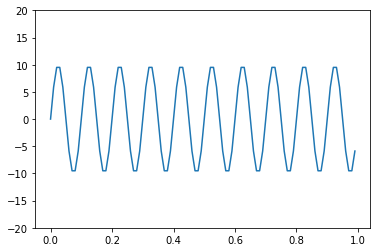

In [3]:
plt.plot(x,y)
plt.ylim(-20,20) # para fijar los limites del eje y, en este caso -20 y 20
plt.show()

### Ejercicio 1
Hemos definido una onda de sonido de referencia la cual vamos a importar y dibujar (curva de color negro). Ademas vamos a dibujar nuestra onda de sonido que hemos definido arriba.

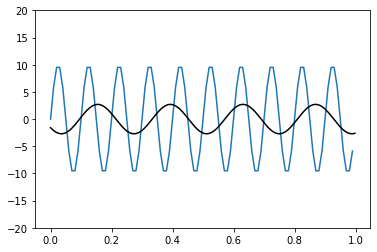

In [4]:
# Onda de referencia
from modulos.onda_ref import onda_ref # para importar la onda de referencia

x_ref,y_ref = onda_ref() # asignamos los valores de x e y de la onda de referencia a las variables x_ref e y_ref respectivamente

# Dibujar las ondas de sonido
plt.plot(x,y)
plt.plot(x_ref,y_ref, color = 'black') # para dibujar la onda de referencia (de color negro)
plt.ylim(-20, 20)
plt.show()

En la siguiente celda cambia los valores de amplitud, fase y frecuencia para tratar de ajustar lo mejor que puedas la curva azul a la curva de referencia negra. Recuerda ejecutar la celda después de cambiar los valores, para que puedas visualizar los cambios.

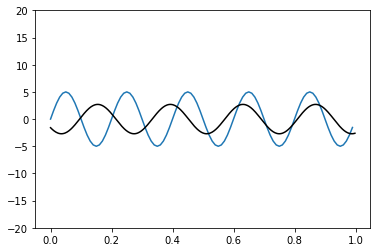

In [5]:
amp = 5 # amplitud
fase = 0 # fase
frec = 5 # frecuencia

y = amp * np.sin(2 * np.pi * (frec * x + fase)) # valores en el eje y de la curva con los nuevos parametros (x no cambia)

# Dibujar las ondas de sonido
plt.plot(x,y)
plt.plot(x_ref,y_ref, color = 'black') # para dibujar la onda de referencia (de color negro)
plt.ylim(-20, 20)
plt.show()

### Ejercicio 2:
Ahora intenta lo mismo pero usando controles deslizantes.

In [6]:
# Primero definimos los parametros que queremos modificar de manera interactiva (ctrl_amp,ctrl_fase,ctrl_frec)
# y el rango de valores posibles a asignar, por ejemplo: (1,20,0.1) = valores entre 1 y 20 en intervalos de 0.1 
@interact(ctrl_amp = (1, 20, 0.1), ctrl_fase = (0, 1, 0.1), ctrl_frec = (1,10,0.1))
def onda_interactiva(ctrl_amp = 10, ctrl_fase = 0, ctrl_frec = 10):
    plt.plot(x, ctrl_amp * np.sin(2 * np.pi * (ctrl_frec * x + ctrl_fase)))
    plt.plot(x_ref,y_ref, color = 'black')
    plt.ylim((-20,20))
    plt.show()

interactive(children=(FloatSlider(value=10.0, description='ctrl_amp', max=20.0, min=1.0), FloatSlider(value=0.…

Mas facil ahora, ¿no? ¿Crees que este tipo de grafica interactiva te ayuda a entender mejor el significado de los parametros *amp*, *fase* y *frec*?

Si al definir el rango de valores que va a tomar cada parametro usamos una lista de valores, el tipo de widget cambia automaticamente.

In [7]:
@interact(ctrl_amp = (1, 20, 0.1), ctrl_fase = (0, 1, 0.1), ctrl_frec = [1,2,3,4,5,6,7,8,9,10])
def onda_interactiva(ctrl_amp = 10, ctrl_fase = 0, ctrl_frec = 10):
    plt.plot(x, ctrl_amp * np.sin(2 * np.pi * (ctrl_frec * x + ctrl_fase)))
    plt.plot(x_ref,y_ref, color = 'black')
    plt.ylim((-20,20))
    plt.show()

interactive(children=(FloatSlider(value=10.0, description='ctrl_amp', max=20.0, min=1.0), FloatSlider(value=0.…

### Ejercicio 3
¿Qué tal si ahora no solo vemos 👀 pero escuchamos 👂 la onda? Puedes cambiar el valor de la frecuencia de la onda (valores bajos de frecuencia producen sonidos mas graves y valores mas altos producen sonidos mas agudos). Después de cambiar el valor de la frecuencia de onda, recuerde hacer clic en el botón Reproducir para escuchar el sonido de la onda.

In [8]:
# Primero definimos el parametro que queremos modificar de manera interactiva (frec_Hz) y los valores posibles a asignar
@interact(frec_Hz = [50,100,200,500]) 
# definimos la funcion "onda_interactiva" que va a dibujar la grafica
def onda_interactiva(frec_Hz = 50): # entre parantesis debemos poner el valor inicial del parametro interactivo
    x = np.arange(0,1,1/44100) # x axis from 0 to 1 with a 1/500 step
    y = amp * np.sin(2 * np.pi * (frec_Hz * x + fase))
    plt.figure(figsize=(20,3))
    plt.plot(x,y)
    display(Audio(y, rate=44100)) 

interactive(children=(Dropdown(description='frec_Hz', options=(50, 100, 200, 500), value=50), Output()), _dom_…

Modificando el codigo de arriba comprueba si tienes **"súper oido"** y puedes escuchar sonidos con frecuencias inferiores a 20 Hz o superiores a 20000 Hz (el espectro audible humano = 20-20000 Hz).